In [ ]:
Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering 
at the University of Minnesota. Members of the GroupLens Research Project are involved in many research
projects related to the fields of information filtering, collaborative filtering, and recommender systems. 
The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated 
collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative
filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall
information by filtering solutions, integrating into content-based methods, as well as, improving current
collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find 
features affecting the ratings of any particular movie and build a model to predict the movie ratings.

In [1]:
import pandas as pd

In [2]:
movies_df = pd.read_csv('movies.dat', header=None, sep='::', engine='python', encoding='ISO-8859-1')
users_df = pd.read_csv('users.dat', header=None, sep='::', engine='python', encoding='ISO-8859-1')
ratings_df = pd.read_csv('ratings.dat', header=None, sep='::', engine='python', encoding='ISO-8859-1')

In [3]:
movies_df.columns = ['MovieID', 'Title', 'Genres']
users_df.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip']
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [4]:
merged_data = pd.merge(ratings_df, users_df, on='UserID')
master_data = pd.merge(merged_data, movies_df, on='MovieID')
master_data = master_data[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]
master_data.to_csv('Master_Data.csv', index=False)

In [5]:
master_data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,1193,One Flew Over the Cuckoo's Nest (1975),2,56,M,16,5
2,1193,One Flew Over the Cuckoo's Nest (1975),12,25,M,12,4
3,1193,One Flew Over the Cuckoo's Nest (1975),15,25,M,7,4
4,1193,One Flew Over the Cuckoo's Nest (1975),17,50,M,1,5
...,...,...,...,...,...,...,...
1000204,2198,Modulations (1998),5949,18,M,17,5
1000205,2703,Broken Vessels (1998),5675,35,M,14,3
1000206,2845,White Boys (1999),5780,18,M,17,1
1000207,3607,One Little Indian (1973),5851,18,F,20,5


In [6]:
import matplotlib.pyplot as plt

In [7]:
users_df = pd.read_csv('users.dat', header=None, sep='::', engine='python', encoding='ISO-8859-1')
users_df.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip']

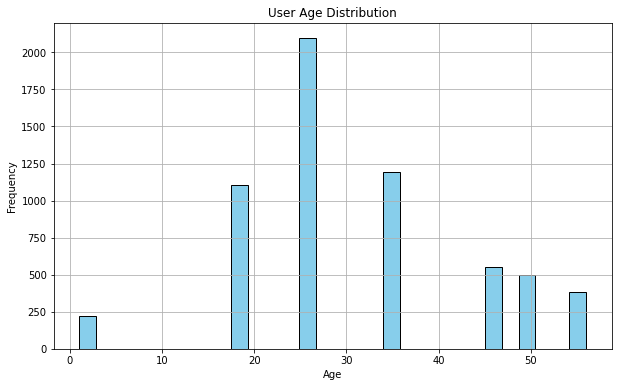

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(users_df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('User Age Distribution')
plt.grid(True)
plt.show()

In [9]:
age_summary = users_df['Age'].describe()

print("\nSummary Statistics for User Age:")
print(age_summary)


Summary Statistics for User Age:
count    6040.000000
mean       30.639238
std        12.895962
min         1.000000
25%        25.000000
50%        25.000000
75%        35.000000
max        56.000000
Name: Age, dtype: float64


In [10]:
movies_df.columns = ['MovieID', 'Title', 'Genres']
users_df.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip']
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']


In [11]:
merged_data = pd.merge(ratings_df, users_df, on='UserID')
master_data = pd.merge(merged_data, movies_df, on='MovieID')
toy_story_ratings = master_data[master_data['Title'] == 'Toy Story']


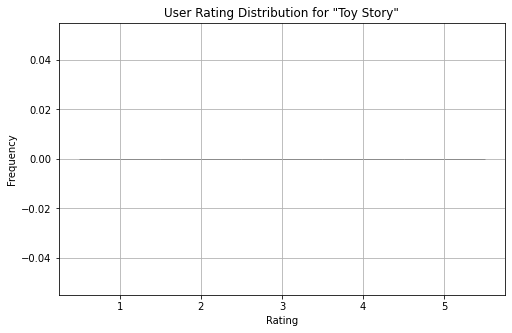

In [12]:
plt.figure(figsize=(8, 5))
plt.hist(toy_story_ratings['Rating'], bins=5, range=(0.5, 5.5), color='lightgreen', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('User Rating Distribution for "Toy Story"')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

In [13]:
rating_summary = toy_story_ratings['Rating'].describe()

print("\nSummary Statistics for User Ratings of 'Toy Story':")
print(rating_summary)


Summary Statistics for User Ratings of 'Toy Story':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Rating, dtype: float64


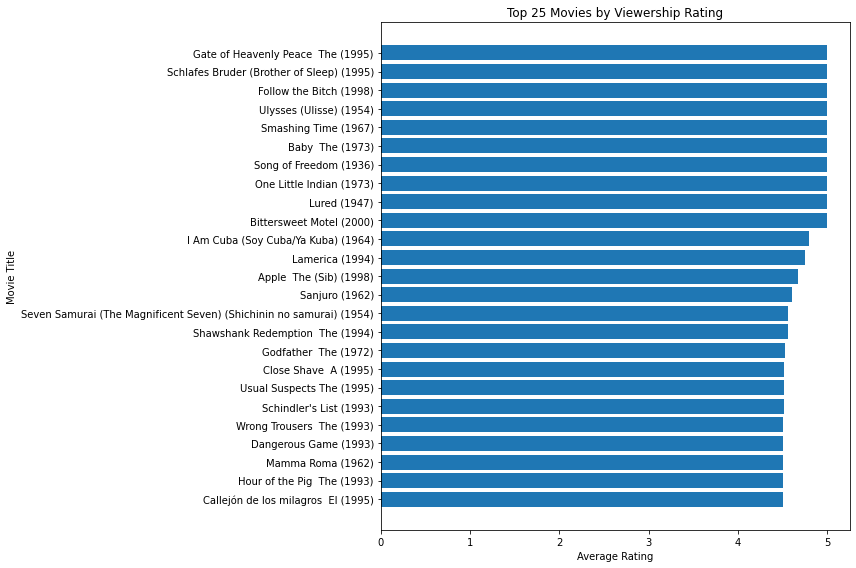

In [29]:
movie_ratings = master_data.groupby('Title')['Rating'].mean()
top_25_movies = movie_ratings.sort_values(ascending=False).head(25)
movie_ratings = ratings_df.groupby('MovieID')['Rating'].mean()
top_25_movies = movie_ratings.nlargest(25)
top_25_movies = pd.merge(top_25_movies, movies_df[['MovieID', 'Title']], on='MovieID')
plt.figure(figsize=(12, 8))
plt.barh(top_25_movies['Title'], top_25_movies['Rating'])
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 25 Movies by Viewership Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [31]:
print(top_25_movies)

,MovieID,Rating,Title
0,787,5.000000,Gate of Heavenly Peace The (1995)
1,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995)
2,1830,5.000000,Follow the Bitch (1998)
3,3172,5.000000,Ulysses (Ulisse) (1954)
4,3233,5.000000,Smashing Time (1967)
5,3280,5.000000,Baby The (1973)
6,3382,5.000000,Song of Freedom (1936)
7,3607,5.000000,One Little Indian (1973)
8,3656,5.000000,Lured (1947)
9,3881,5.000000,Bittersweet Motel (2000)


In [15]:
user_2696_ratings = master_data[master_data['UserID'] == 2696]
print("Ratings for all movies reviewed by User ID 2696:")
print(user_2696_ratings[['Title', 'Rating']])


Ratings for all movies reviewed by User ID 2696:
                                                 Title  Rating
24345                        Back to the Future (1985)       2
29848                E.T. the Extra-Terrestrial (1982)       3
244232                        L.A. Confidential (1997)       4
250014                                Lone Star (1996)       5
273633                                      JFK (1991)       1
277808                 Talented Mr. Ripley  The (1999)       4
371178  Midnight in the Garden of Good and Evil (1997)       4
377250                                 Cop Land (1997)       3
598042                                 Palmetto (1998)       4
603189                        Perfect Murder  A (1998)       4
609204                                Game  The (1997)       4
611956          I Know What You Did Last Summer (1997)       2
612552                    Devil's Advocate  The (1997)       4
613486                                   Psycho (1998)       4
616546

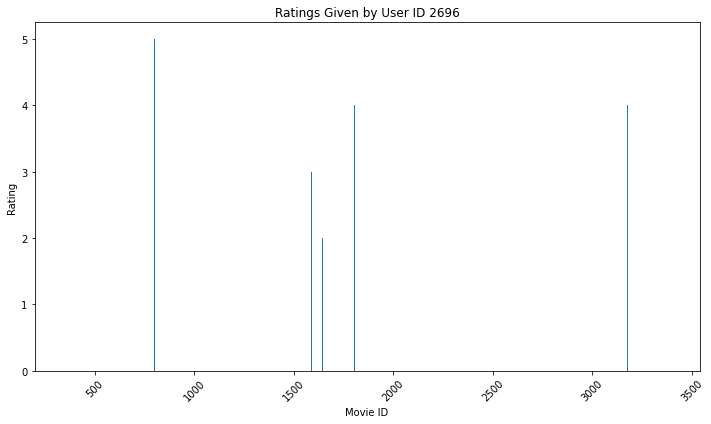

In [30]:
user_2696_ratings = ratings_df[ratings_df['UserID'] == 2696]
plt.figure(figsize=(10, 6))
plt.bar(user_2696_ratings['MovieID'], user_2696_ratings['Rating'])
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.title('Ratings Given by User ID 2696')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
movies_df['Genres'] = movies_df['Genres'].str.split('|')
unique_genres = set()
for genres_list in movies_df['Genres']:
    unique_genres.update(genres_list)
print("Unique Genres:")
print(unique_genres)

Unique Genres:
{'War', 'Mystery', 'Animation', "Children's", 'Fantasy', 'Documentary', 'Action', 'Comedy', 'Western', 'Sci-Fi', 'Thriller', 'Adventure', 'Romance', 'Drama', 'Crime', 'Film-Noir', 'Horror', 'Musical'}


In [17]:
one_hot_encoded_genres = movies_df['Genres'].str.join('|').str.get_dummies()
movies_df = pd.concat([movies_df, one_hot_encoded_genres], axis=1)
print(movies_df)

      MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender  The (2000)   

                                Genres  Action  Adventure  Animation  \
0      [Animation, Children's, Comedy]       0          0          1   
1     [Adventure, Children's, Fantasy]       0          1          0   
2                    [Comedy, Romance]       0          0          0   
3                      [Comedy, Drama]       0          0          0   
4  

In [23]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

In [24]:
reader = Reader(line_format='user item rating timestamp', sep='::', rating_scale=(1, 5))
data = Dataset.load_from_file('ratings.dat', reader=reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
model = SVD()
model.fit(trainset)
predictions = model.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 0.8746


In [26]:
print("Example Predictions:")
for uid, iid, true_r, est, _ in predictions[:10]:
    print("User:", uid, "| Movie:", iid, "| Actual Rating:", true_r, "| Predicted Rating:", est)


Example Predictions:
User: 1841 | Movie: 3717 | Actual Rating: 1.0 | Predicted Rating: 1.8920816904090336
User: 3715 | Movie: 880 | Actual Rating: 3.0 | Predicted Rating: 3.2303089337543596
User: 2002 | Movie: 3072 | Actual Rating: 4.0 | Predicted Rating: 3.8279858671580542
User: 3332 | Movie: 2734 | Actual Rating: 3.0 | Predicted Rating: 3.5780024937674226
User: 3576 | Movie: 631 | Actual Rating: 3.0 | Predicted Rating: 2.6515311876042444
User: 2092 | Movie: 3247 | Actual Rating: 3.0 | Predicted Rating: 2.6385902504034497
User: 5283 | Movie: 2643 | Actual Rating: 1.0 | Predicted Rating: 1.997814275838243
User: 4610 | Movie: 2124 | Actual Rating: 3.0 | Predicted Rating: 2.9472743345748196
User: 398 | Movie: 3176 | Actual Rating: 4.0 | Predicted Rating: 3.605907424975234
User: 4533 | Movie: 357 | Actual Rating: 4.0 | Predicted Rating: 3.6242423442212313
